In [133]:
from Groups import *

### Usage

In [134]:
G = DihegralGroup(3)

In [135]:
G

Group(e,r^1,r^2,s,sr^1,sr^2)

In [136]:
x = G.Element(1)
y = G.Element(2)
x,y,x*y

(r^1, r^2, e)

In [137]:
R = G.R
R

    	   e	r^1	r^2	s	sr^1	sr^2	
    	   -	---	---	-	----	----	
e	|  e	r^1	r^2	s	sr^1	sr^2	
r^1	|  r^1	r^2	e	sr^2	s	sr^1	
r^2	|  r^2	e	r^1	sr^1	sr^2	s	
s	|  s	sr^1	sr^2	e	r^1	r^2	
sr^1	|  sr^1	sr^2	s	r^2	e	r^1	
sr^2	|  sr^2	s	sr^1	r^1	r^2	e	

In [138]:
R.T # The Calley table

array([[0, 1, 2, 3, 4, 5],
       [1, 2, 0, 5, 3, 4],
       [2, 0, 1, 4, 5, 3],
       [3, 4, 5, 0, 1, 2],
       [4, 5, 3, 2, 0, 1],
       [5, 3, 4, 1, 2, 0]], dtype=int32)

In [139]:
R.Elements # The elements that the Relation is operating over

['e', 'r^1', 'r^2', 's', 'sr^1', 'sr^2']

In [140]:
H = R.generate([1])
H

Group(e,r^1,r^2)

In [141]:
C = Coset(H,2)
C

(r^2 * Group(e,r^1,r^2))

In [142]:
[R[i] for i in C.expand()]

['r^2', 'e', 'r^1']

In [143]:
G.Cosets(H)

[(e * Group(e,r^1,r^2)), (s * Group(e,r^1,r^2))]

In [144]:
N = G.MinimumNormalSubGroup()
N

Group(e,r^1,r^2)

In [145]:
G/N

Group((e * Group(e,r^1,r^2)),(s * Group(e,r^1,r^2)))

In [146]:
gen = G.MinimumGeneratingSet(True)
gen

Finding minimum generating set for :
 Group(e,r^1,r^2,s,sr^1,sr^2)
N :
 Group(e,r^1,r^2)
n :
 [1]
G/N :
 Group((e * Group(e,r^1,r^2)),(s * Group(e,r^1,r^2)))
Finding minimum generating set for :
 Group((e * Group(e,r^1,r^2)),(s * Group(e,r^1,r^2)))
N :
 Group((e * Group(e,r^1,r^2)),(s * Group(e,r^1,r^2)))
g :
 [3]
N is abelian.


[3, 1]

In [147]:
G_g = R.generate(gen)
G_g

Group(e,r^1,r^2,s,sr^1,sr^2)

### Complexity Analysis

In [148]:
from matplotlib.pyplot import plot,xlabel,ylabel,title,legend,figure
from time import time

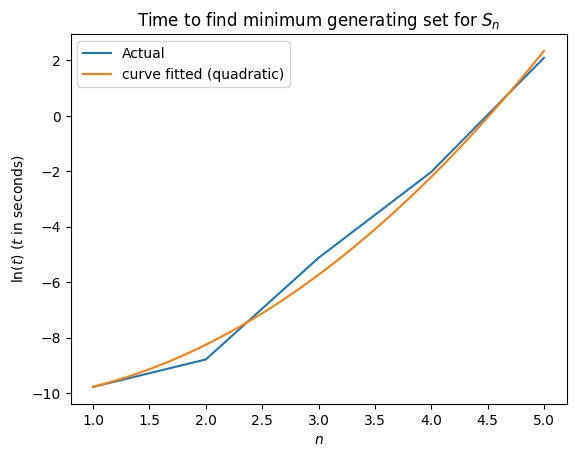

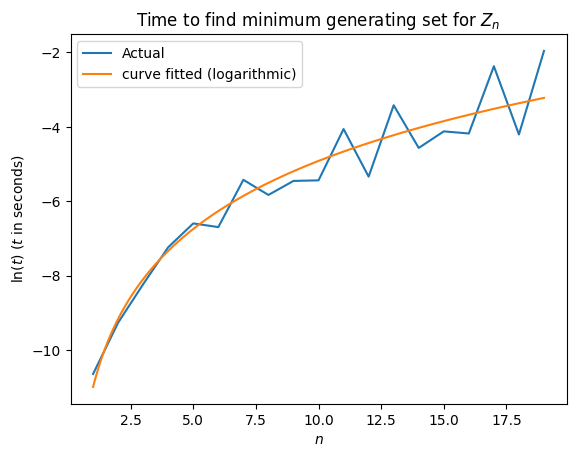

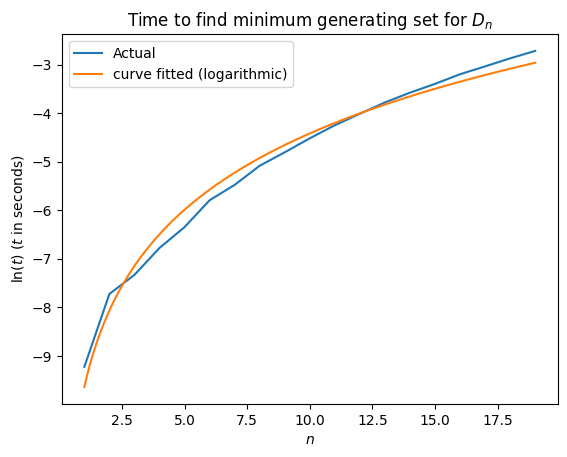

In [149]:
D = {
    PermutationGroup:(6,1,2,lambda x:x**2,'S','quadratic'),
    AdditiveGroupOnIntegersModulo:(20,1,10,log,'Z','logarithmic'),
    DihegralGroup:(20,1,10,log,'D','logarithmic')
}
for Gfunc in D:
    N,d,iterations,basis,name,curve = D[Gfunc]
    figure()

    L = []
    for n in range(1,N,d):
        G = Gfunc(n)
        to = time()
        for _ in range(iterations):
            g = G.MinimumGeneratingSet()
            Gg = G.R.generate(g)
            if not G == Gg:
                print("oof")
                break
        L.append((time()-to)/iterations)
    L = log(array(L))
    plot(range(1,N,d),L)

    # Curve fitting
    n = arange(1,N,d)
    Ln = basis(n)
    X = array([[ln,1] for ln in Ln])
    XT = X.T
    XTX = X.T @ X
    XTXi = linalg.inv(XTX)
    pseudo_inverse = XTXi @ XT
    theta = dot(pseudo_inverse,L)
    a,b = theta
    n = linspace(1,N-1,1000)
    Ln = basis(n)
    L_pred = Ln*a + b
    plot(n,L_pred)

    xlabel("$ n $")
    ylabel("$\ln(t)$ ($ t $ in seconds)")
    title(f"Time to find minimum generating set for $ {name}_n $")
    legend(["Actual",f"curve fitted ({curve})"])